Importing **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Loading Iris Dataset

In [2]:
iris = datasets.load_iris()

Creating Dataframe for Iris

In [3]:
iris_d = pd.DataFrame(iris.data,columns=iris.feature_names)

Checking first 5 elements

In [4]:
iris_d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_d.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

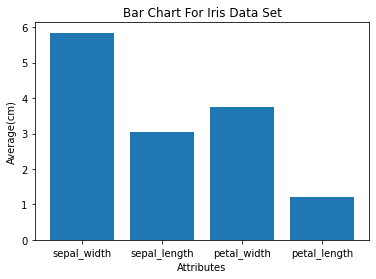

In [6]:
m1= iris_d['sepal length (cm)'].mean()
m2= iris_d['sepal width (cm)'].mean()
m3= iris_d['petal length (cm)'].mean()
m4= iris_d['petal width (cm)'].mean()                               

y1 = np.array([m1,m2,m3,m4])
x1 = np.array(["sepal_width","sepal_length","petal_width","petal_length"])

plt.bar(x1,y1,)

plt.xlabel("Attributes")
plt.ylabel("Average(cm)")

plt.title("Bar Chart For Iris Data Set")
plt.show()

In [7]:
X = iris_d.iloc[:,:].values

Finding Optimum Clusters for K-Mean

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
  kmeans.fit(X)
  # inertia method return wcss for that model
  wcss.append(kmeans.inertia_)

Plotting The Elbow Method Graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


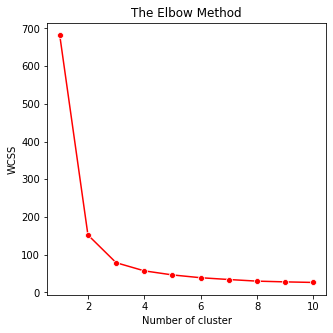

In [9]:
plt.figure(figsize = (5,5))
sns.lineplot(range(1,11),wcss,marker='o',color = "red")
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

Fitting K-means to the dataset

In [10]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [12]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Visualising the clusters - On the first two columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

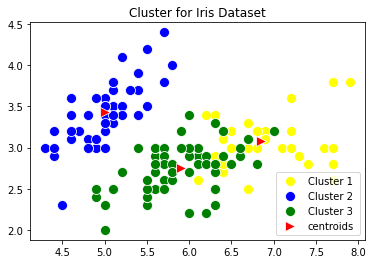

In [13]:
sns.scatterplot(X[y_kmeans == 0,0],X[y_kmeans == 0,1], color = "yellow", label = "Cluster 1 ", s = 100)
sns.scatterplot(X[y_kmeans == 1,0],X[y_kmeans == 1,1], color = "blue", label = "Cluster 2 ", s = 100)
sns.scatterplot(X[y_kmeans == 2,0],X[y_kmeans == 2,1], color = "green", label = "Cluster 3 ", s = 100)
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "red",
                label = "centroids", s= 100, marker = ">")
plt.grid(False)
plt.title("Cluster for Iris Dataset")
plt.legend()
plt.show()

Conclusion 

# The number of optimum cluster for the given dataset is 3